In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load data
d = pd.read_csv('rab5traj.csv')
uid = np.unique(d['pid'])
data = d[d['pid']==11]
# data = d[d['pid']==15]
# data = d[d['pid']==24]
# data = d[d['pid']==33]
x = np.array(data['x'])
y = np.array(data['y'])
t = np.array(data['t'])    
#calculate displacements
disps = np.sqrt( np.power(x-x[0],2) + np.power(y-y[0],2) )
#load neural network model
import tensorflow as tf
model = tf.keras.models.load_model("model3dense_n20.h5")
#loop through the data points and estimate the hurst exponent in every window of 20 points
h = []
ht = []
for i in range(10,len(disps)-11):
    inx = disps[(i-10):(i+11)]
    #apply differencing and normalization on the data
    inx = np.array([(inx[1:]-inx[0:-1])/(np.amax(inx)-np.amin(inx))])
    test = model.predict(inx)
    h.append(test[0][0])
    ht.append(t[i])

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


In [2]:
print(len(disps))
print(len(disps)-20)
print(len(h))
print(len(t))
print(len(ht))

800
780
779
800
779


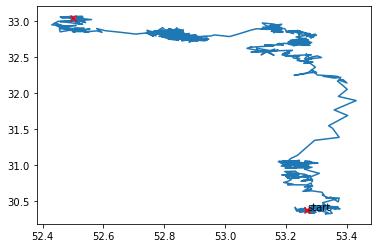

In [3]:
plt.figure()
plt.text(x[0], y[0], 'start', zorder=2)
plt.scatter(x[0], y[0], c='r', marker='x', zorder=2)
plt.scatter(x[-1], y[-1], c='r', marker='x', zorder=2)
plt.plot(x, y, zorder=1)

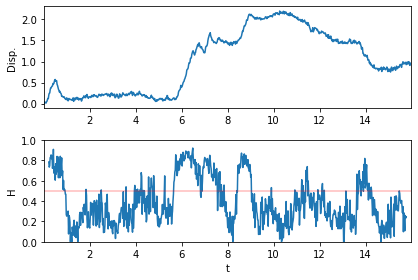

In [7]:
#plot displacements
plt.figure()
plt.subplot(211)
plt.plot(t,disps)
plt.ylabel('Disp.')
plt.xlim([t[0],t[-1]])
plt.subplot(212)
plt.plot(ht,h)
plt.plot([t[0],t[-1]],[0.5,0.5],'r-',lw=0.4)
plt.ylabel('H')
plt.xlabel('t')
plt.xlim(t[0],t[-1])
plt.ylim(0,1)
plt.tight_layout()
plt.show()

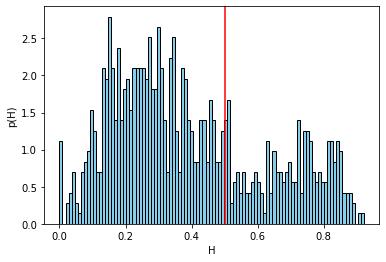

In [47]:
nbins = 100

plt.figure()
plt.hist(h, nbins, density=True, color='skyblue', ec='black')  # normalised so area under histogram integrates to 1
plt.xlabel('H')
plt.ylabel('p(H)')  # probability density
plt.axvline(0.5, color='r')

counts sum =  778
778
normalised counts sum =  0.9999999999999998


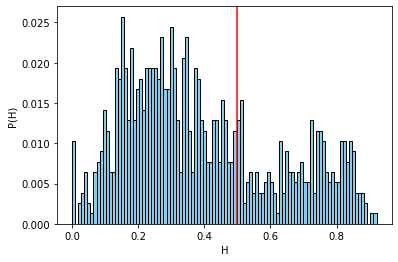

In [49]:
counts, bins = np.histogram(h, nbins)
normalised_counts = counts/len(h)
plt.hist(bins[:-1], bins, weights=normalised_counts, color='skyblue', ec='black')
plt.xlabel('H')
plt.ylabel(r'P(H)')  # probability
plt.axvline(0.5, color='r')

print('counts sum = ', np.sum(counts))
print(len(h))
print('normalised counts sum = ', np.sum(normalised_counts))

In [46]:
import scipy

h_mean = np.mean(h)
h_var = np.var(h)
h_std = np.std(h)
h_skew = scipy.stats.skew(h)
h_kurtosis = scipy.stats.kurtosis(h)

print('h mean = ', h_mean)
print('h variance = ', h_var)
print('h stddev = ', np.sqrt(h_var), 'or ', h_std)
print('h skew = ', h_skew)
print('h kurtosis = ', h_kurtosis)

h mean =  0.3908663
h variance =  0.05255961
h stddev =  0.22925884 or  0.22925884
h skew =  0.5481801673790565
h kurtosis =  -0.7540415301721786
